<a href="https://colab.research.google.com/github/nitin578/103_Impact_Covid19_Vaccinations/blob/main/India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

In [5]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
india_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/India.csv")

In [7]:
india_df.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,source_url,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,https://twitter.com/MoHFW_INDIA/status/1350815...,NaN
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,https://www.mohfw.gov.in/,NaN
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,https://www.mohfw.gov.in/,NaN


In [22]:
india_df.shape

(283, 7)

In [23]:
india_df.dtypes

location                    object
date                        object
vaccine                     object
total_vaccinations           int64
people_vaccinated            int64
people_fully_vaccinated      int64
total_boosters             float64
dtype: object

In [30]:
# removing unwanted columns "source_url"
columns_to_remove = ['source_url']
india_df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [41]:
# Replacing NaN values with O in "total_boosters"
india_df["total_boosters"].fillna("0", inplace = True)

In [42]:
india_df.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,0


In [36]:
india_df.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

In [37]:
# check the unique values
india_df.columns.unique()

Index(['location', 'date', 'vaccine', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

In [38]:
# check the unique values in vaccine column
india_df.vaccine.unique()

array(['Covaxin, Oxford/AstraZeneca',
       'Covaxin, Oxford/AstraZeneca, Sputnik V'], dtype=object)

In [39]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


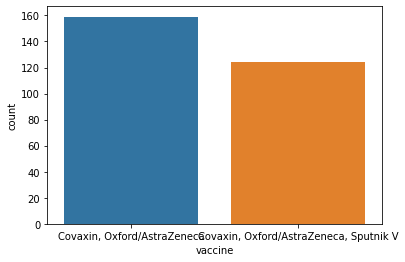

In [43]:
sns.countplot(india_df['vaccine'])

In [44]:
# describe the data
# Numerical values
numerical_features = [feature for feature in india_df.columns if india_df[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  3


In [45]:
india_df[numerical_features].head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,0,0,0
1,191181,191181,0
2,224301,224301,0
3,454049,454049,0
4,674835,674835,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aaaa91b10>,
      dtype=object)

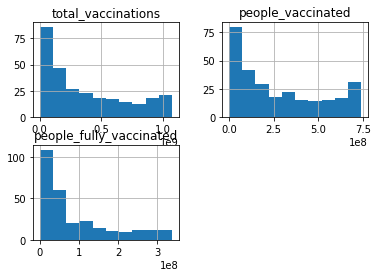

In [46]:
india_df[numerical_features].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aaa94ad10>]],
      dtype=object)

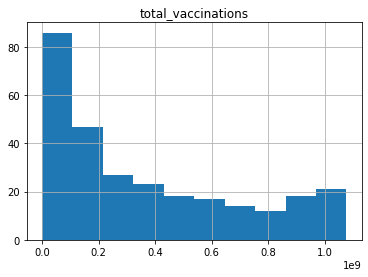

In [47]:
india_df[numerical_features].hist(column = 'total_vaccinations')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aaa8c9450>]],
      dtype=object)

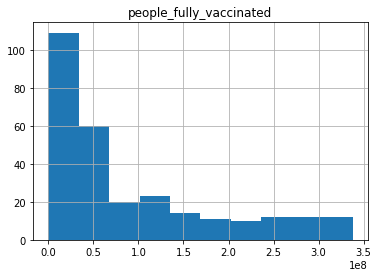

In [48]:
india_df[numerical_features].hist(column = 'people_fully_vaccinated')

In [49]:
# describe the data
# categorical values
categorical_features = [feature for feature in india_df.columns if india_df[feature].dtype == 'O']
print('Number of numerical variables: ', len(categorical_features))

Number of numerical variables:  4


In [50]:
india_df[categorical_features].head()

,location,date,vaccine,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",0


In [51]:
# converting the column date from string into datetime object
india_df.dtypes

location                   object
date                       object
vaccine                    object
total_vaccinations          int64
people_vaccinated           int64
people_fully_vaccinated     int64
total_boosters             object
dtype: object

In [52]:
from datetime import datetime

In [53]:
india_df['date'] = india_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [54]:
india_df.dtypes

location                           object
date                       datetime64[ns]
vaccine                            object
total_vaccinations                  int64
people_vaccinated                   int64
people_fully_vaccinated             int64
total_boosters                     object
dtype: object

In [55]:
india_df[numerical_features].describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,2.830000e+02,2.830000e+02,2.830000e+02
mean,3.615130e+08,2.739400e+08,8.757301e+07
std,3.373545e+08,2.425015e+08,9.657203e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.040011e+07,5.155084e+07,8.849274e+06
50%,2.402819e+08,1.943260e+08,4.595591e+07
75%,6.011572e+08,4.657360e+08,1.354212e+08
max,1.077107e+09,7.393578e+08,3.377495e+08


In [56]:
india_df[categorical_features].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,location,date,vaccine,total_boosters
count,283,283,283,283
unique,1,283,2,1
top,India,2021-05-04 00:00:00,"Covaxin, Oxford/AstraZeneca",0
freq,283,1,159,283
first,NaN,2021-01-15 00:00:00,NaN,NaN
last,NaN,2021-11-04 00:00:00,NaN,NaN


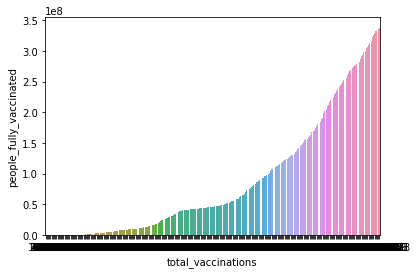

In [57]:
sns.barplot(x='total_vaccinations', y='people_fully_vaccinated', data = india_df[numerical_features] )

# Missing **values**

In [58]:
india_df.isnull().count()

location                   283
date                       283
vaccine                    283
total_vaccinations         283
people_vaccinated          283
people_fully_vaccinated    283
total_boosters             283
dtype: int64

In [59]:
india_df.isnull().values.any()

False

In [60]:
display(india_df.dtypes.value_counts())

object            3
int64             3
datetime64[ns]    1
dtype: int64

In [61]:
india_df[numerical_features].isnull().sum()

total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
dtype: int64

# **outliers**

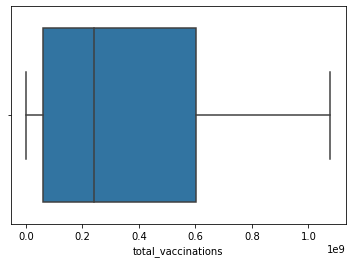

In [62]:
import seaborn as sns
sns.boxplot(x= india_df[numerical_features]['total_vaccinations'])

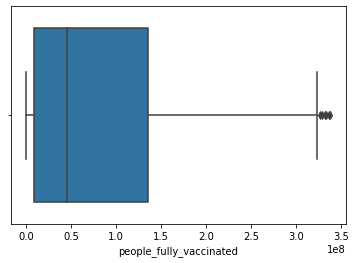

In [63]:
sns.boxplot(x= india_df[numerical_features]['people_fully_vaccinated'])

# **Correlation**

In [64]:
# Correlation
india_df[numerical_features].corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
total_vaccinations,1.000000,0.997989,0.987250
people_vaccinated,0.997989,1.000000,0.975174
people_fully_vaccinated,0.987250,0.975174,1.000000


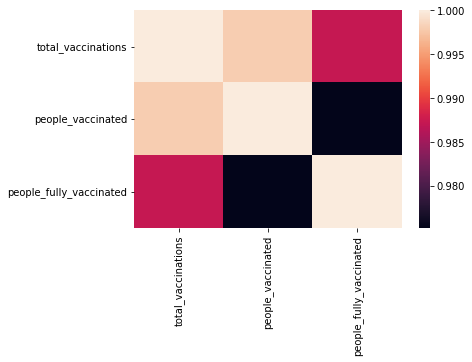

In [65]:
sns.heatmap(india_df[numerical_features].corr())

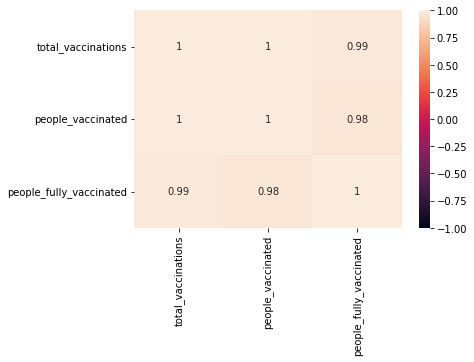

In [66]:
sns.heatmap(india_df[numerical_features].corr(), vmin=-1, vmax=1, annot=True)